# Farhad Kazemi - Predict how long a trip will take given a starting point and destination, and a better understanding of Citi Bike ridership for the Mayor of New York City through visualizing data.

### Overview
**Our Client:** Mayor of New York City
**Objective:** Better understanding of citibike ridership by creating a report for January 2017.

1. Top 5 stations with the most starts (showing # of starts) 
2. Trip duration by user type
3. Most popular trips based on start station and stop station)
4. Rider performance by Gender and Age based on avg trip distance (station to station), median speed (distance traveled / trip duration) 
5. What is the busiest bike in NYC in 2017? How many times was it used? How many minutes was it in use?  

Additionally, the Mayor has an idea that he wants to pitch to Citi Bike and needs your help proving its feasibility. He would like Citi Bike to add a new feature to their kiosks:
“Enter a destination and we’ll tell you how long the trip will take”.

We need you to build a model that can predict how long a trip will take given a starting point and destination. You will need to get creative about the factors that will predict travel time. Include model evaluation statistics and discussion of predictive features. 

### Q1: Top 5 Stations 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import datetime as dt
import pandas as pd
from pandas import *
import seaborn as sns
mydata = read_csv('201701-citibike-tripdata.csv')
mydata.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,680,2017-01-01 00:00:21,2017-01-01 00:11:41,3226,W 82 St & Central Park West,40.782750,-73.971370,3165,Central Park West & W 72 St,40.775794,-73.976206,25542,Subscriber,1965.0,2
1,1282,2017-01-01 00:00:45,2017-01-01 00:22:08,3263,Cooper Square & E 7 St,40.729236,-73.990868,498,Broadway & W 32 St,40.748549,-73.988084,21136,Subscriber,1987.0,2
2,648,2017-01-01 00:00:57,2017-01-01 00:11:46,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,18147,Customer,NaN,0
3,631,2017-01-01 00:01:10,2017-01-01 00:11:42,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,21211,Customer,NaN,0
4,621,2017-01-01 00:01:25,2017-01-01 00:11:47,3143,5 Ave & E 78 St,40.776829,-73.963888,3152,3 Ave & E 71 St,40.768737,-73.961199,26819,Customer,NaN,0


In [2]:
# Is there any noise or cleanup"
#Percentage of our missing data.
total = mydata.isnull().sum().sort_values(ascending=False)
percent = (mydata.isnull().sum()/mydata.isnull().count()*100).sort_values(ascending=False)
our_miss_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(our_miss_data)

                         Total   Percent
Birth Year               29076  4.001233
User Type                 3193  0.439398
Gender                       0  0.000000
Bike ID                      0  0.000000
End Station Longitude        0  0.000000
End Station Latitude         0  0.000000
End Station Name             0  0.000000
End Station ID               0  0.000000
Start Station Longitude      0  0.000000
Start Station Latitude       0  0.000000
Start Station Name           0  0.000000
Start Station ID             0  0.000000
Stop Time                    0  0.000000
Start Time                   0  0.000000
Trip Duration                0  0.000000


In [3]:
#Is mydata formatted correctly
mydata['Start Station Name'] = mydata['Start Station Name'].astype('category')
mydata['End Station Name'] = mydata['End Station Name'].astype('category')
mydata['User Type'] = mydata['User Type'].astype('category')
mydata['Gender'] = mydata['Gender'].astype('category')
mydata['Start Time'] = to_datetime(mydata['Start Time'])
mydata['Stop Time'] = to_datetime(mydata['Stop Time'])
round(mydata.describe(),2)

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year
count,726676.00,726676.00,726676.00,726676.00,726676.00,726676.00,726676.00,726676.00,697600.00
mean,777.90,1222.92,40.74,-73.98,1197.25,40.74,-73.99,21713.05,1977.12
std,11246.83,1277.96,0.07,0.12,1266.09,0.07,0.12,4199.31,11.93
min,61.00,72.00,0.00,-74.03,72.00,0.00,-74.03,14529.00,1885.00
25%,331.00,358.00,40.72,-74.00,356.00,40.72,-74.00,17859.00,1969.00
50%,526.00,482.00,40.74,-73.99,479.00,40.74,-73.99,21295.00,1979.00
75%,860.00,3092.00,40.76,-73.98,3078.00,40.76,-73.98,25803.00,1987.00
max,5325688.00,3446.00,40.80,0.00,3447.00,40.80,0.00,27325.00,2000.00


In [4]:
#Top 5 Stations
top5station = pd.DataFrame() 
## Count number of rows with each unique value of variable
## Select first 5 rows
## index of first 5 rows
top5station['Station']=mydata['Start Station Name'].value_counts().head().index
top5station['Number of Starts']=mydata['Start Station Name'].value_counts().head().values
print(top5station)
##print(top5station)
top5station['Station'] = top5station['Station'].astype('object')
##print(top5station)

                 Station  Number of Starts
0  Pershing Square North              8795
1        W 21 St & 6 Ave              5454
2     E 17 St & Broadway              5110
3     Broadway & E 22 St              4913
4        8 Ave & W 33 St              4816


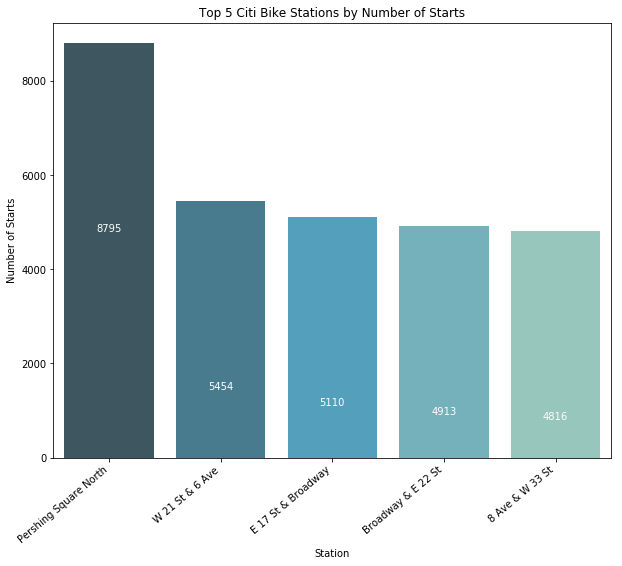

In [5]:
#Plot for Part 1: Top 5 Stations
rcParams['figure.figsize'] = 10,8
q1 = sns.barplot('Station', 'Number of Starts', data = top5station, palette="GnBu_d")
q1.set_title('Top 5 Citi Bike Stations by Number of Starts', fontsize = 12)
q1.set_xticklabels(q1.get_xticklabels(),rotation=40, ha = 'right')
for index, row in top5station.iterrows():
    q1.text(index,row['Number of Starts']-4000,row['Number of Starts'], 
            color='white', ha="center", fontsize = 10)
plt.show()

### Q2: Trip Duration by User Type

In [6]:
#Drop NA Usertype
mydata = mydata.dropna(subset=['User Type']) 
#Calculate trip duration
trip_duration_user = pd.DataFrame()
trip_duration_user['Avg. Trip Duration'] = round(mydata.groupby('User Type')['Trip Duration'].mean(),2)
trip_duration_user = trip_duration_user.reset_index()
trip_duration_user['User Type'] = trip_duration_user['User Type'].astype('object')


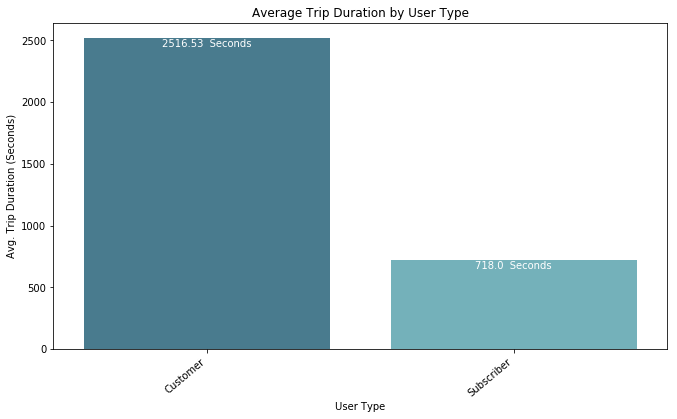

In [37]:
# plot
q2 = sns.barplot('User Type', 'Avg. Trip Duration', data = trip_duration_user,palette="GnBu_d")
q2.set_title('Average Trip Duration by User Type')
#rcParams['figure.figsize'] = 12,7
q2.set_xticklabels(q2.get_xticklabels(),rotation=40, ha = 'right')
q2.set_ylabel('Avg. Trip Duration (Seconds)')
for index, row in trip_duration_user.iterrows():
    q2.text(index,row['Avg. Trip Duration']-70,(str(row['Avg. Trip Duration'])+"  Seconds"), 
             color='white', ha="center", fontsize = 10)
plt.show()

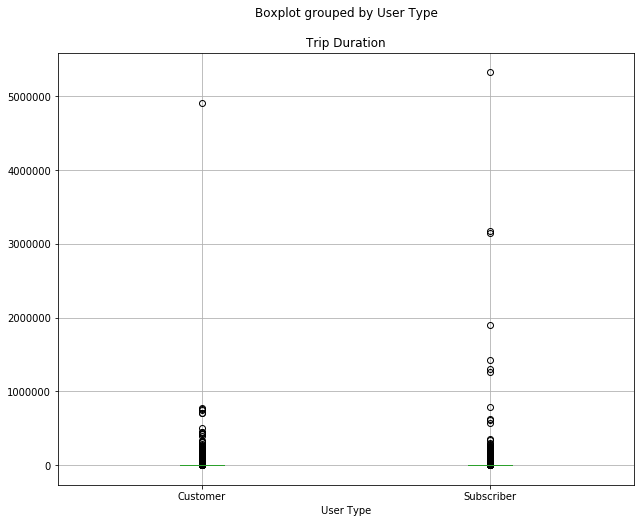

In [8]:
#Boxplots
mydata.boxplot('Trip Duration', by = 'User Type')
plt.show()

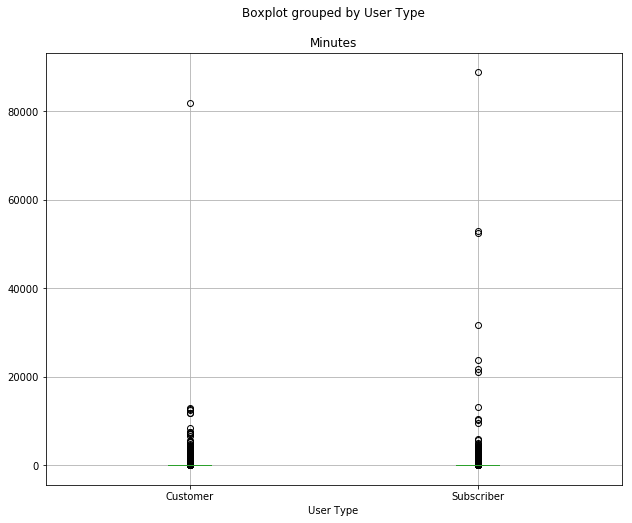

In [9]:
mydata['Minutes'] = mydata['Trip Duration']/60
mydata['Minutes'] = round(mydata['Minutes'])
mydata['Minutes'] = mydata['Minutes'].astype(int)
#Boxplot 2 
mydata.boxplot('Minutes', by = 'User Type')
plt.show()

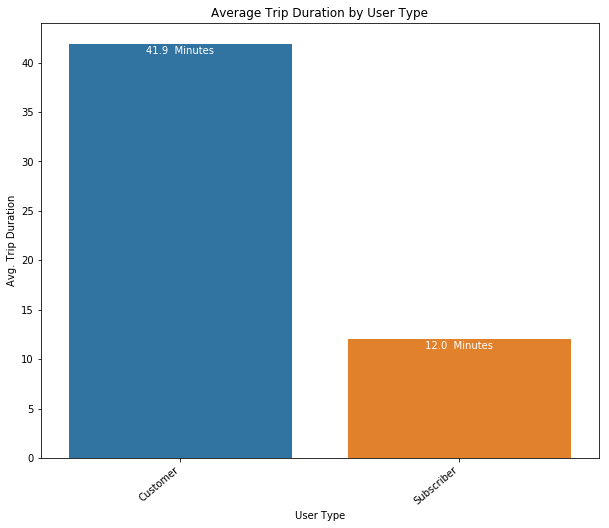

In [10]:
#Average Trip Duration Based on Minutes
trip_duration_user2 = pd.DataFrame()
trip_duration_user2['Avg. Trip Duration'] = round(mydata.groupby('User Type')['Minutes'].mean(),1)
trip_duration_user2 = trip_duration_user2.reset_index()
trip_duration_user2['User Type'] = trip_duration_user2['User Type'].astype('object')

q3 = sns.barplot('User Type', 'Avg. Trip Duration', data = trip_duration_user2)#,palette="GnBu_d")
q3.set_title('Average Trip Duration by User Type')
#rcParams['figure.figsize'] = 12,10
q3.set_xticklabels(q3.get_xticklabels(),rotation=40, ha = 'right')
for index, row in trip_duration_user2.iterrows():
    q3.text(row.name,row['Avg. Trip Duration']-1,(str(row['Avg. Trip Duration'])+"  Minutes"), 
             color='white', ha="center", fontsize = 10)
plt.show()
mydata['Minutes'] = mydata['Trip Duration']/60

### Q3: Most Popular Trip based on start station and stop station

In [11]:
#Extracting the 20 most popular trips
trips_mydata = pd.DataFrame()
## grouped by values in column named "col".
## Size of each group
## Reset index of DataFrame to row numbers
trips_mydata = mydata.groupby(['Start Station Name','End Station Name']).size().reset_index(name = 'Number of Trips')
trips_mydata = trips_mydata.sort_values('Number of Trips', ascending = False)
trips_mydata["Start Station Name"] = trips_mydata["Start Station Name"].astype(str)
trips_mydata["End Station Name"] = trips_mydata["End Station Name"].astype(str)
trips_mydata["Trip"] = trips_mydata["Start Station Name"] + " to " + trips_mydata["End Station Name"]
trips_mydata = trips_mydata[:20]
trips_mydata = trips_mydata.drop(['Start Station Name', "End Station Name"], axis = 1)
trips_mydata = trips_mydata.reset_index()

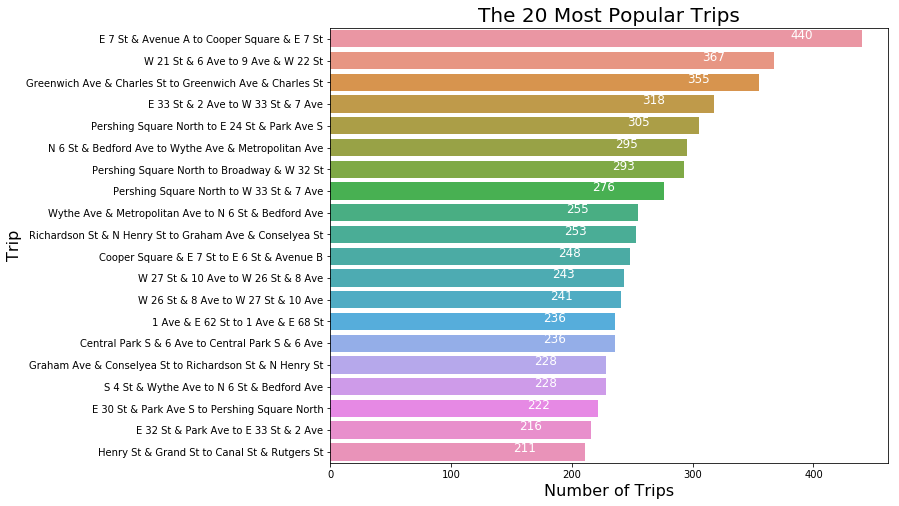

In [12]:
q4 = sns.barplot('Number of Trips','Trip', data = trips_mydata)#,palette="GnBu_d")
q4.set_title('The 20 Most Popular Trips', fontsize = 20)
q4.set_ylabel("Trip",fontsize=16)
q4.set_xlabel("Number of Trips",fontsize=16)
for index, row in trips_mydata.iterrows():
    q4.text(row['Number of Trips']-50,index,row['Number of Trips'], 
             color='white', ha="center",fontsize = 12)
plt.show()

### Q 4: Rider Performance by Gender and Age

**Ask:** Rider performance by Gender and Age based on avg trip distance (station to station), median speed (distance traveled/trip duration)<br />

Let's make sure the data we're working with here is clean.<br />

1. anomaly detection
    - For Birth Year, there are some people born prior to 1938. I remove people before this date.
2. Caulculate an Age column.
3. Calculate trip distance (Miles) I Used the geopy.distance packge 
4. Caulculate Speed (mile/hr)
5. Dealing with round trips
6. Determine Gender and Age performance based on Average Trip distance<br />

In [13]:
mydata = mydata.drop(mydata.index[(mydata['Birth Year'] < 1938)])
#Combine coordinates to calculate distance based on Vincenty
mydata['Start Coordinates'] = list(zip(mydata['Start Station Latitude'], mydata['Start Station Longitude']))
mydata['End Coordinates'] = list(zip(mydata['End Station Latitude'], mydata['End Station Longitude']))

In [14]:
# I produced distance data. I you want produce it please don't take commented signs
from geopy import distance
dist = []

for i in range(len(mydata)):
    dist.append(distance.vincenty(mydata.iloc[i]['Start Coordinates'],mydata.iloc[i]['End Coordinates']).miles)
    if (i%1000000==0):
        print(i)

##print(dist)
dist = pd.DataFrame({'row':dist})
dist.to_csv('Distance_between_stations.csv')

0


In [15]:
dist = pd.read_csv('Distance_between_stations.csv',index_col=0,header = 0)
print(dist.head())

        row
0  0.542899
1  1.340572
2  0.575889
3  0.575889
4  0.575889


In [16]:
#Reset Index to avoid issues in future calculations
mydata = mydata.reset_index()
mydata = mydata.drop('index',axis =1)
mydata['Distance'] = dist
mydata = mydata.dropna(subset=['Birth Year'])

In [17]:
#Calculate age
mydata['Age'] = 2018 - mydata['Birth Year']
mydata['Age'] = mydata['Age'].astype(int)
#drop roundtrips
mydata = mydata.drop(mydata.index[(mydata['Distance'] == 0)])

In [18]:
mydata['mile_hour'] = round(mydata['Distance']/(mydata['Minutes']/60),2)

In [19]:
round(mydata.describe(),2)

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Minutes,Distance,Age,mile_hour
count,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00
mean,710.71,1208.10,40.74,-73.99,1181.64,40.74,-73.99,21750.20,1977.15,11.85,1.04,40.85,6.04
std,9441.82,1271.46,0.03,0.02,1258.75,0.03,0.02,4199.73,11.79,157.36,0.78,11.79,1.68
min,61.00,72.00,40.65,-74.02,72.00,40.65,-74.03,14529.00,1938.00,1.02,0.02,18.00,0.00
25%,326.00,358.00,40.72,-74.00,356.00,40.72,-74.00,17892.00,1969.00,5.43,0.52,31.00,5.02
50%,512.00,481.00,40.74,-73.99,479.00,40.74,-73.99,21344.00,1979.00,8.53,0.82,39.00,6.02
75%,822.00,3087.00,40.76,-73.98,3065.00,40.75,-73.98,25817.00,1987.00,13.70,1.30,49.00,7.09
max,5325688.00,3443.00,40.80,-73.93,3447.00,40.80,-73.93,27325.00,2000.00,88761.47,9.15,80.00,17.46


In [20]:
#Dropping unknown gender 
mydata1 = mydata.drop(mydata.index[(mydata['Gender'] == 0)])

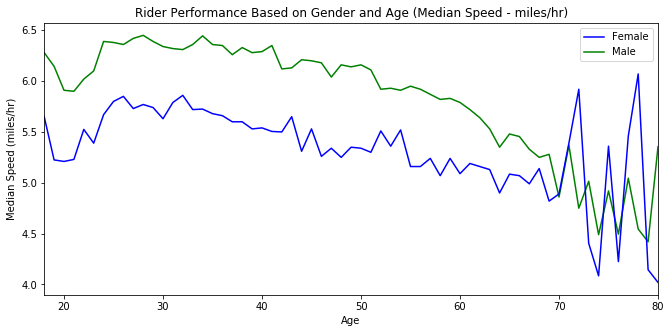

In [21]:
#Rider performance by age and Gender in Miles/hr
#del([fig,q5])
fig1, q6 = plt.subplots(figsize=(11,5))
mydata1.groupby(['Age','Gender']).median()['mile_hour'].unstack().plot(ax=q6,color ="bg")
q6.legend(['Female', 'Male'])
plt.ylabel('Median Speed (miles/hr)')
plt.title('Rider Performance Based on Gender and Age (Median Speed - miles/hr)')
plt.show()

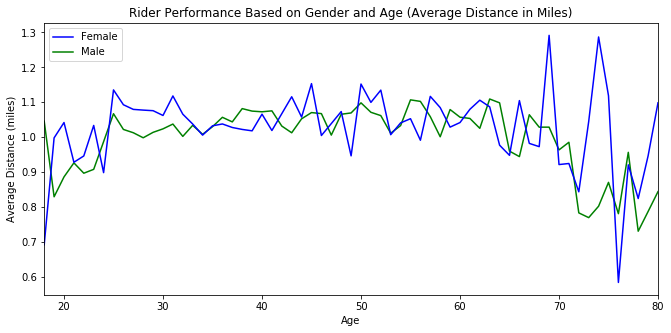

In [22]:
#Rider performance by age and Gender in Averge Distance
del([fig1,q6])
fig2, q7 = plt.subplots(figsize=(11,5))
mydata1.groupby(['Age','Gender']).mean()['Distance'].unstack().plot(ax=q7,color ="bg")
q7.legend(['Female', 'Male'])
plt.ylabel('Average Distance (miles)')
plt.title('Rider Performance Based on Gender and Age (Average Distance in Miles)')
plt.show()

### Q5: Busiest Bike by Times and Minutes Used
 1. The busiest bike in Jan 2017 
    - Bike 26386
 2. Times was it used.
     -265 times
 3. Minutes was it in use.
      - 88968 Minutes 

In [23]:
#Bike usage based on number of times used
#del(mydata1)
bike_use_mydata = pd.DataFrame()
bike_use_mydata = mydata.groupby(['Bike ID']).size().reset_index(name = 'Number of Times Used')
bike_use_mydata = bike_use_mydata.sort_values('Number of Times Used', ascending = False)
#bike_use_mydata.to_csv('Q5.csv')
bike_use_mydata = bike_use_mydata[:20]
bike_use_mydata['Bike ID'] = bike_use_mydata['Bike ID'].astype(str)
bike_use_mydata['Bike ID'] = ('Bike ' + bike_use_mydata['Bike ID'])
bike_use_mydata = bike_use_mydata.reset_index()
#bike_use_mydata.head()

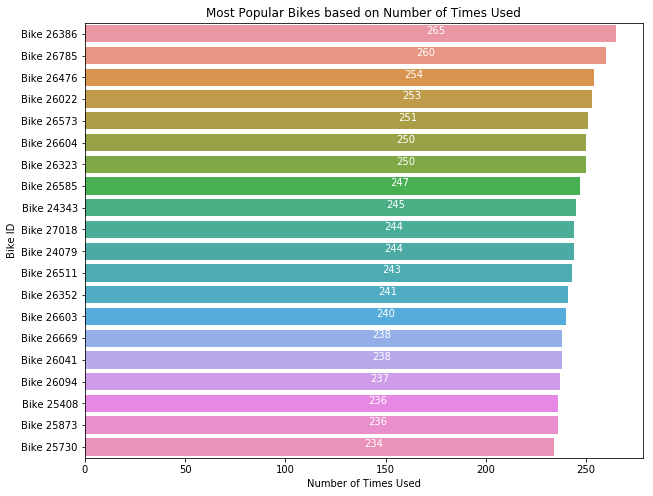

In [24]:
#Visual of most used bike based on Number of Trips
q8 = sns.barplot('Number of Times Used', 'Bike ID',data = bike_use_mydata)
q8.set_title('Most Popular Bikes based on Number of Times Used')
for index, row in bike_use_mydata.iterrows():
    q8.text(row['Number of Times Used']-90,index,row['Number of Times Used'], color='white', ha="center", fontsize =10)
plt.show()

In [25]:
#Bike usage based on minutes used
bike_min_mydata = pd.DataFrame()
bike_min_mydata['Minutes Used'] = mydata.groupby('Bike ID')['Minutes'].sum()
bike_min_mydata = bike_min_mydata.reset_index()
bike_min_mydata = bike_min_mydata.sort_values('Minutes Used', ascending = False)
bike_min_mydata['Bike ID'] = bike_min_mydata['Bike ID'].astype(str)
bike_min_mydata['Bike ID'] = ('Bike ' + bike_min_mydata['Bike ID'])
bike_min_mydata = bike_min_mydata[:20]
bike_min_mydata = bike_min_mydata.reset_index()

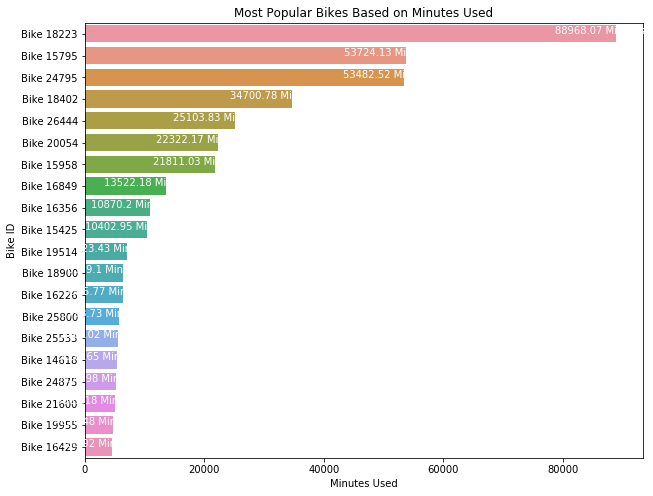

In [26]:
#most used bike based on number of minutes
q9 = sns.barplot('Minutes Used', 'Bike ID',data = bike_min_mydata)
q9.set_title('Most Popular Bikes Based on Minutes Used')
rcParams['figure.figsize'] = 11,6
for index, row in bike_min_mydata.iterrows():
    q9.text(row['Minutes Used']-2800,index,str(round(row['Minutes Used'],2))+' Minutes', 
             color='white', ha="center")
plt.show()

### Q 6: Predictive Model
Gender and age variables can be used in building our model.

Prepare our data for a multivariate regression
 1. Drop irrelevant columns

In [27]:
round(mydata.describe(),2)

,Trip Duration,Start Station ID,Start Station Latitude,Start Station Longitude,End Station ID,End Station Latitude,End Station Longitude,Bike ID,Birth Year,Minutes,Distance,Age,mile_hour
count,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00,685735.00
mean,710.71,1208.10,40.74,-73.99,1181.64,40.74,-73.99,21750.20,1977.15,11.85,1.04,40.85,6.04
std,9441.82,1271.46,0.03,0.02,1258.75,0.03,0.02,4199.73,11.79,157.36,0.78,11.79,1.68
min,61.00,72.00,40.65,-74.02,72.00,40.65,-74.03,14529.00,1938.00,1.02,0.02,18.00,0.00
25%,326.00,358.00,40.72,-74.00,356.00,40.72,-74.00,17892.00,1969.00,5.43,0.52,31.00,5.02
50%,512.00,481.00,40.74,-73.99,479.00,40.74,-73.99,21344.00,1979.00,8.53,0.82,39.00,6.02
75%,822.00,3087.00,40.76,-73.98,3065.00,40.75,-73.98,25817.00,1987.00,13.70,1.30,49.00,7.09
max,5325688.00,3443.00,40.80,-73.93,3447.00,40.80,-73.93,27325.00,2000.00,88761.47,9.15,80.00,17.46


In [28]:
#Drop Irrelevant data
def drop_data(mydata):
    mydata = mydata.drop(['Start Time','Trip Duration','Stop Time','Start Station ID','Start Station Latitude','Start Station Longitude',
                  'Start Coordinates','End Station ID', 'End Station Latitude', 'End Station Longitude', 
                  'End Coordinates','Bike ID', 'Start Station Name','Birth Year','End Station Name','mile_hour','Age'], axis = 1)
    return mydata

mydata_basemodel = drop_data(mydata)
print(mydata_basemodel)

         User Type Gender    Minutes  Distance
0       Subscriber      2  11.333333  0.542899
1       Subscriber      2  21.366667  1.340572
6       Subscriber      1   9.316667  0.788935
7       Subscriber      2  13.766667  1.708449
8       Subscriber      1   4.250000  0.720641
9       Subscriber      1  10.566667  0.169865
10      Subscriber      1  18.016667  0.526321
11      Subscriber      1   7.983333  0.712568
12      Subscriber      1  33.416667  2.667768
13      Subscriber      1  12.300000  1.425480
14      Subscriber      1  15.016667  1.370123
15      Subscriber      1  20.766667  0.356370
16      Subscriber      1  14.983333  1.370123
17      Subscriber      1  25.066667  2.534934
19      Subscriber      1  20.516667  1.677454
20      Subscriber      2   5.850000  0.496774
21      Subscriber      1   3.816667  0.395661
23      Subscriber      1   3.450000  0.482472
27      Subscriber      2  22.366667  1.917471
28      Subscriber      1  19.550000  1.985273
29      Subsc

In [29]:
#mydata_basemodel = mydata_basemodel.drop('Start Time', axis =1)
#print(mydata_basemodel)

In [30]:
#Percentage of missing data.
##def missing_data(mydata):
total2 = mydata_basemodel.isnull().sum().sort_values(ascending=False)
percent2 = (mydata_basemodel.isnull().sum()/mydata_basemodel.isnull().count()*100).sort_values(ascending=False)
missing_data2 = pd.concat([total2, percent2], axis=1, keys=['Total2', 'Percent2'])
print(missing_data2)
##    return missing_data
##missing_data(mydata)

           Total2  Percent2
Distance        0       0.0
Minutes         0       0.0
Gender          0       0.0
User Type       0       0.0


In [31]:
#mydata_basemodel = mydata_basemodel.dropna(subset=['Distance'])

In [32]:
# Convert categorical variable into dummy/indicator variables
mydata_basemodel = pd.get_dummies(mydata_basemodel, drop_first = True)
#mydata_basemodel.dtypes

In [33]:
mydata_basemodel.corr().loc[:,'Minutes']

Minutes                 1.000000
Distance                0.044990
User Type_Subscriber   -0.003094
Gender_1               -0.004161
Gender_2                0.004234
Name: Minutes, dtype: float64

In [34]:
#Train Test Split
#Predictor variable
##X = mydata_basemodel.loc[:,['User Type','Gender','Distance']]
#Target variable
##y = mydata_basemodel.loc[:,['Minutes']]

#Train Test Split
#Predictor variable
X = mydata_basemodel.iloc[:,[1,2,4]]
#Target variable
y = mydata_basemodel.iloc[:,3]
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

/home/farhad/anaconda3/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [35]:
#Fit Linear Regression and check accuracy using sklearn
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test,y_test)

0.97811490487308117

In [36]:
#Summary
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
regressor_OLS = sm.OLS(y_train, X_train).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Gender_1   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 8.192e+06
Date:                Sun, 04 Nov 2018   Prob (F-statistic):               0.00
Time:                        14:08:13   Log-Likelihood:             7.5146e+05
No. Observations:              548588   AIC:                        -1.503e+06
Df Residuals:                  548584   BIC:                        -1.503e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9986      0.004    226.600      0.000       0.990       1.007
Distance                 0.0003      0.000      3.182      0.001       0.000       0.001
User Type_Subscriber    -0.0038      0.004     -0.873      0.383      -0.012       0.005
Gender_2                -0.9951      0.000  -4957.113      0.000      -0.996      -0.995
==============================================================================
Omnibus:                  1073819.150   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1539870245.823
Skew:                         -16.102   Prob(JB):                         0.00
Kurtosis:                     260.547   Cond. No.                         138.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""